# ***Sales Prediction***

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

**Loading Dataset**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/CODSOFT/advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


**Exploratory Data Analysis**

In [ ]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.shape

(200, 4)

In [ ]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

**Data Visualization**

<Axes: >

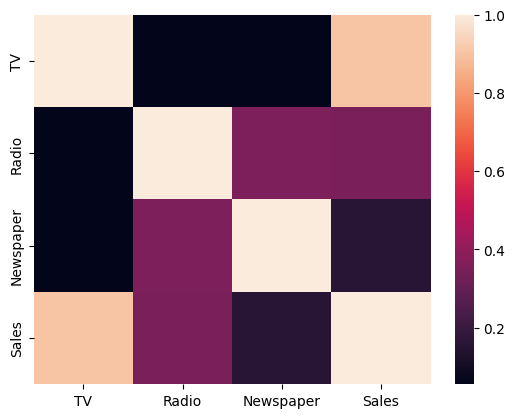

In [ ]:
sns.heatmap(df.corr())

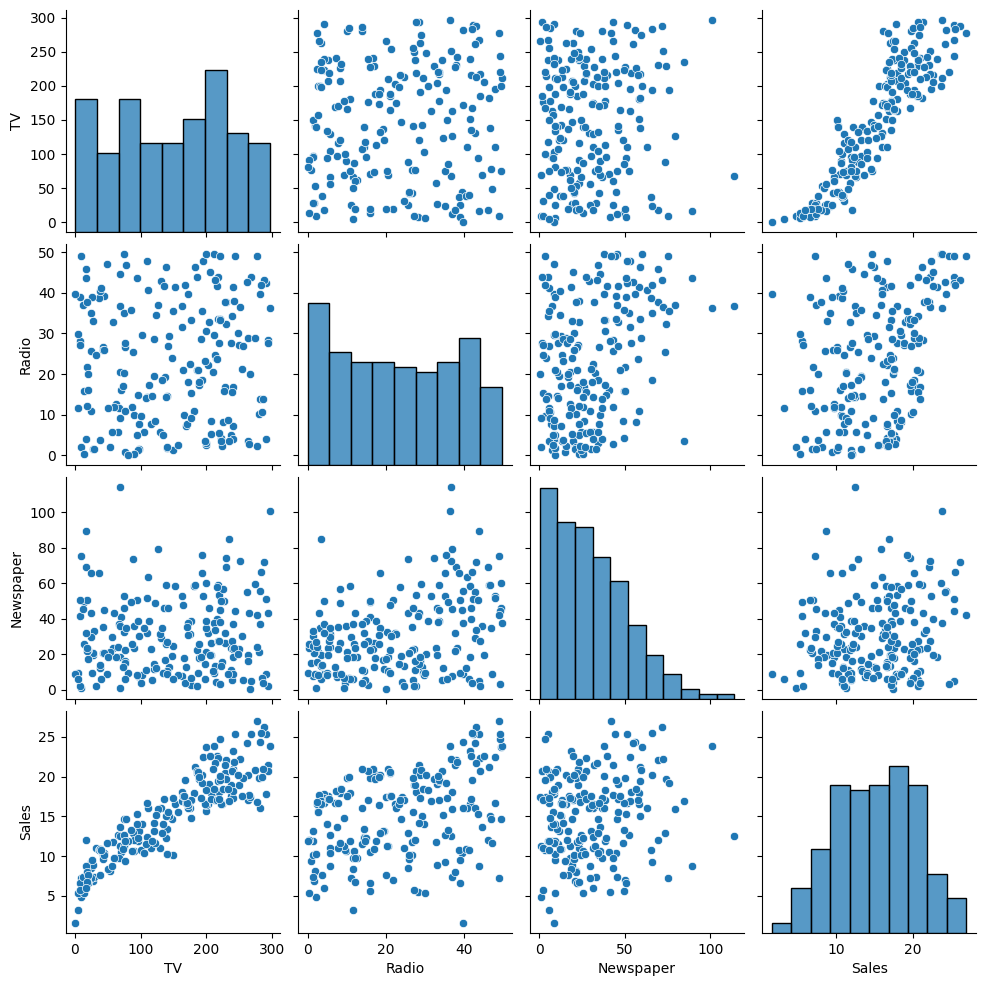

In [ ]:
sns.pairplot(df)

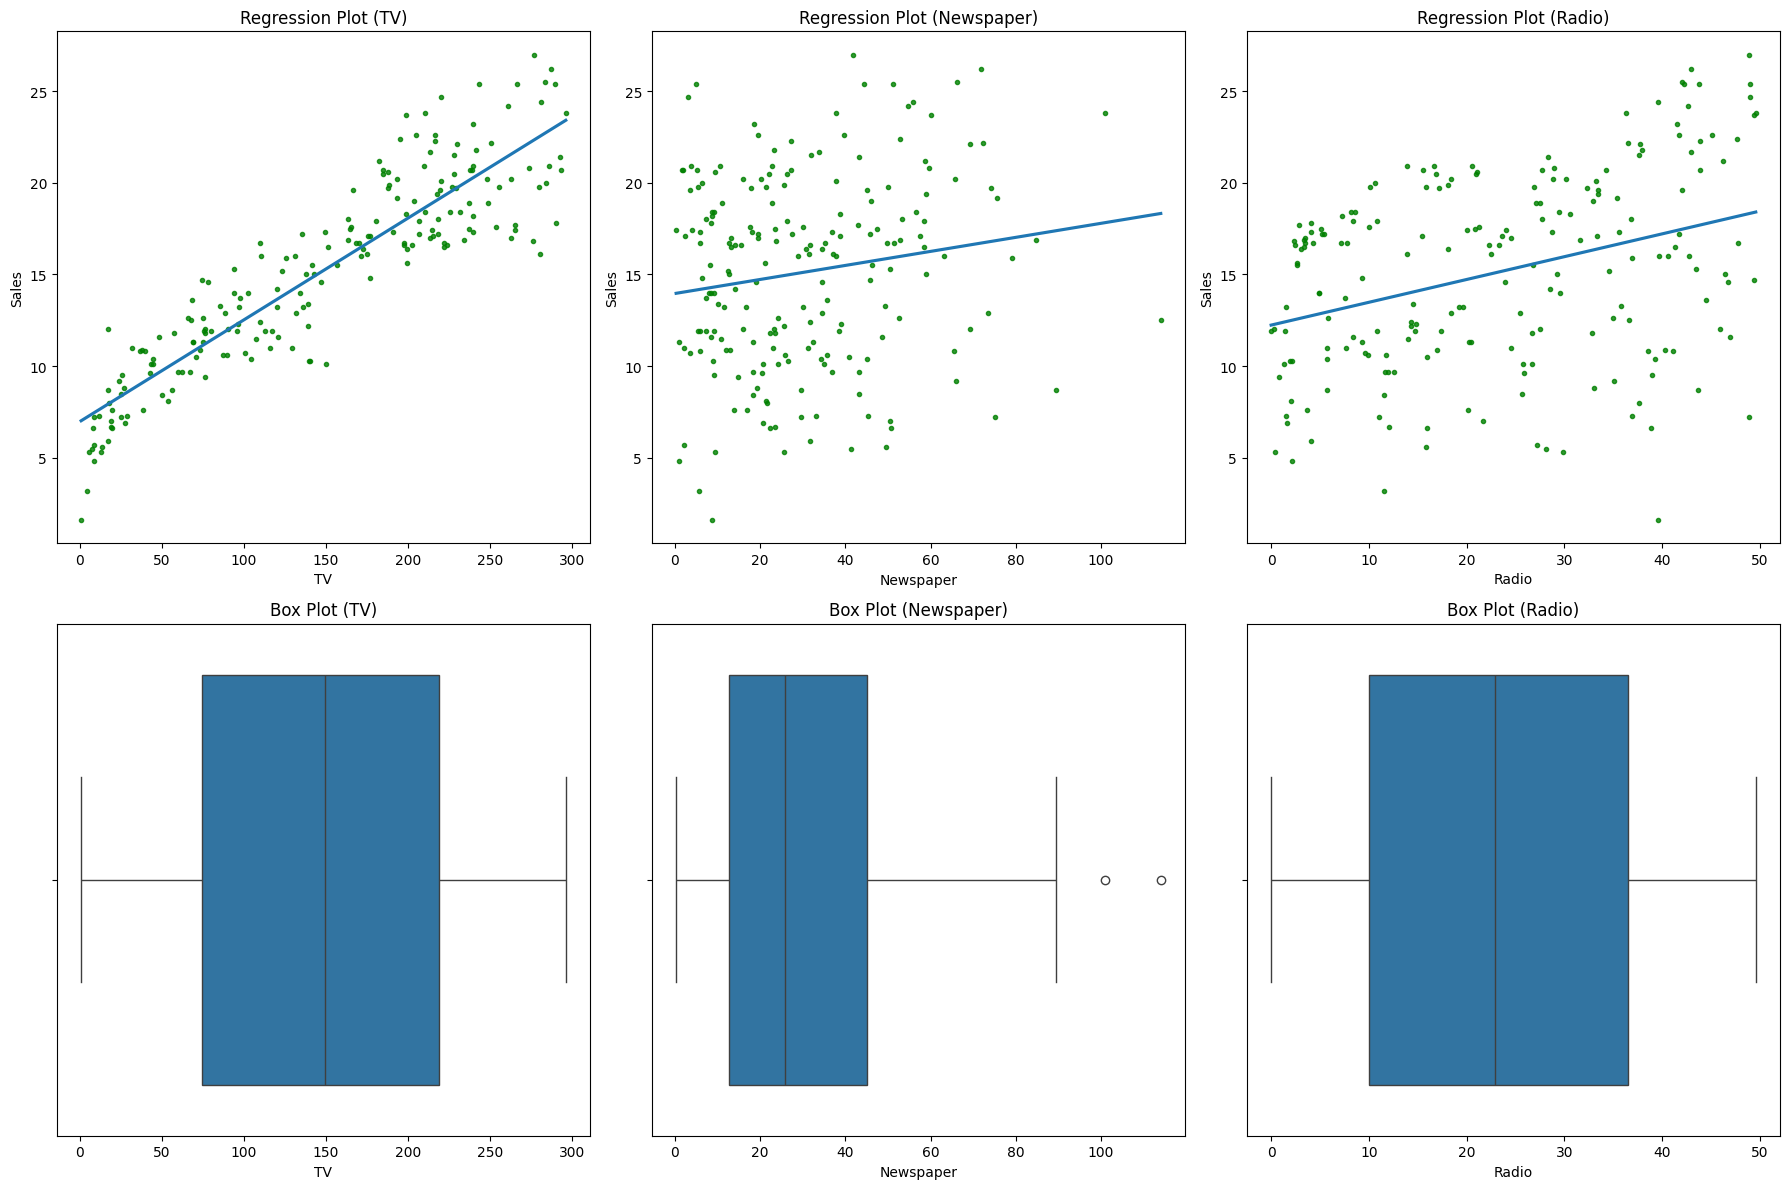

In [ ]:
col = ['TV','Newspaper','Radio']
num_cols = len(col)
num_rows = 2
ply.figure(figsize=(num_cols * 6, num_rows * 6))

# Loop through each column
for idx, i in enumerate(col, start=1):
    #  regression plot
    plt.subplot(num_rows, num_cols, idx)
    sns.regplot(x=df[i], y=df['Sales'], order=1, ci=None, scatter_kws={'color': 'g', 's': 9})
    plt.title(f'Regression Plot ({i})')

    # box plot
    plt.subplot(num_rows, num_cols, idx + num_cols)
    sns.boxplot(x=df[i])
    plt.title(f'Box Plot ({i})')

plt.tight_layout()
plt.show()

**Data Preprocessing and Splitting**

In [ ]:
X = np.array(df['TV']).reshape(-1,1)
y = np.array(df['Sales'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25)

**Model Building and Evaluaion**

1.Linear Regression


Mean Squared Error (MSE): 6.103737440531153
Root Mean Squared Error (RMSE): 2.4705743139058076
Mean Absolute Error (MAE): 2.073571150692846


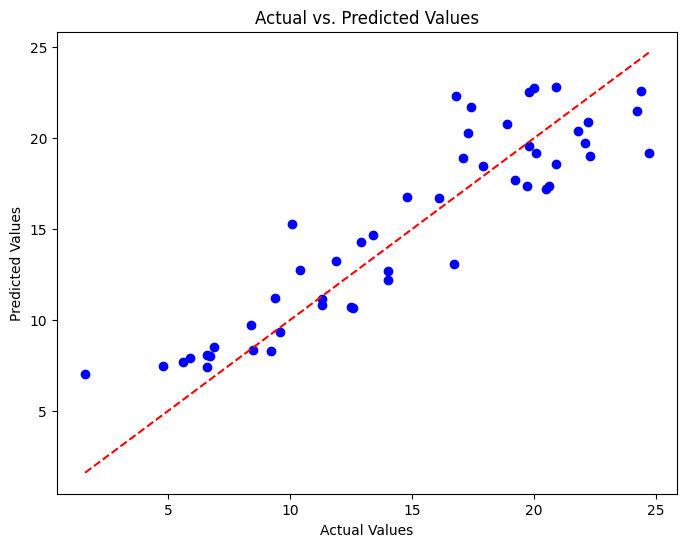

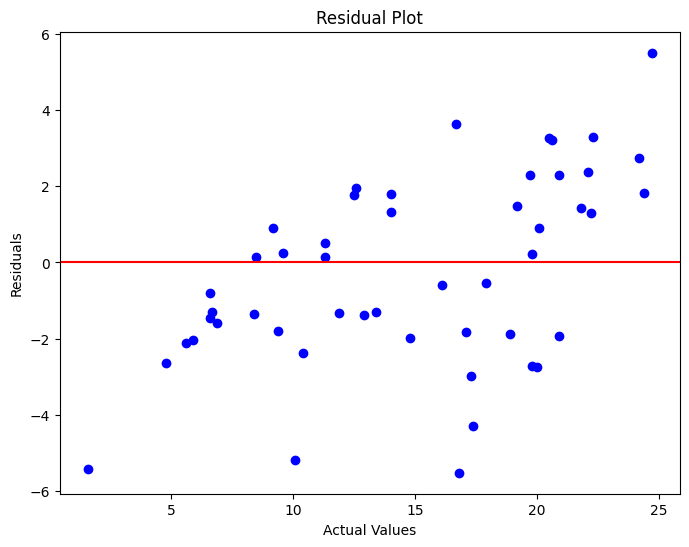

In [ ]:
regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X_test)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

#  Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_test - y_pred))
print("Mean Absolute Error (MAE):", mae)

# Actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


2. Support Vector Regression

Mean Squared Error (MSE) for SVR: 5.480997481066135
Root Mean Squared Error (RMSE) for SVR: 2.341153023846612
Mean Absolute Error (MAE) for SVR: 1.9204490184046494


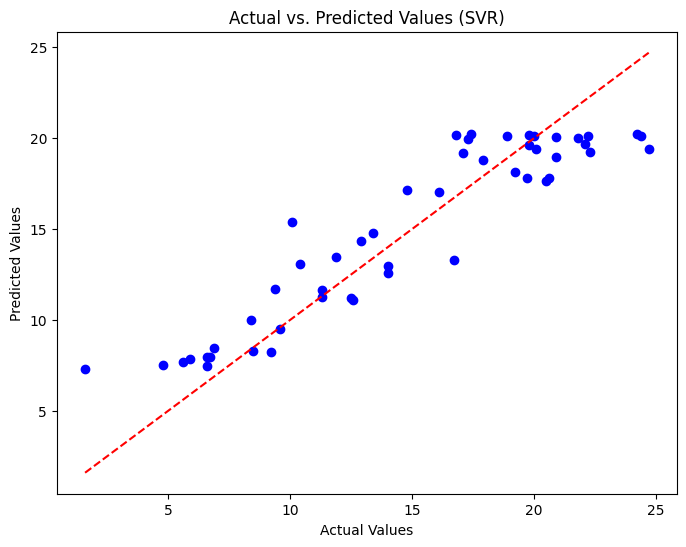

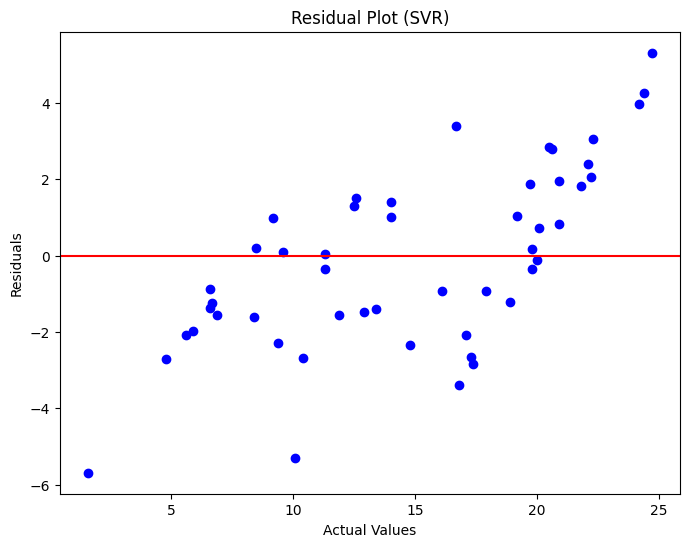

In [ ]:
svr_regressor = SVR(kernel='rbf')  # RBF kernel --> hyperparameter
svr_regressor.fit(X, y)
y_pred_svr = svr_regressor.predict(X_test)

# Mean Squared Error (MSE)
mse_svr = mean_squared_error(y_test, y_pred_svr)
print("Mean Squared Error (MSE) for SVR:", mse_svr)

# Root Mean Squared Error (RMSE)
rmse_svr = np.sqrt(mse_svr)
print("Root Mean Squared Error (RMSE) for SVR:", rmse_svr)

# Mean Absolute Error (MAE)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
print("Mean Absolute Error (MAE) for SVR:", mae_svr)

plt.figure(figsize=(8, 6))

# Actual vs. predicted values
plt.scatter(y_test, y_pred_svr, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (SVR)')
plt.show()

# Residual Plot
residuals_svr = y_test - y_pred_svr
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals_svr, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (SVR)')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


3. Lasso Regression

Mean Squared Error (MSE) for Lasso Regression: 6.104481770999031
Root Mean Squared Error (RMSE) for Lasso Regression: 2.4707249484714056
Mean Absolute Error (MAE) for Lasso Regression: 2.073721512800016


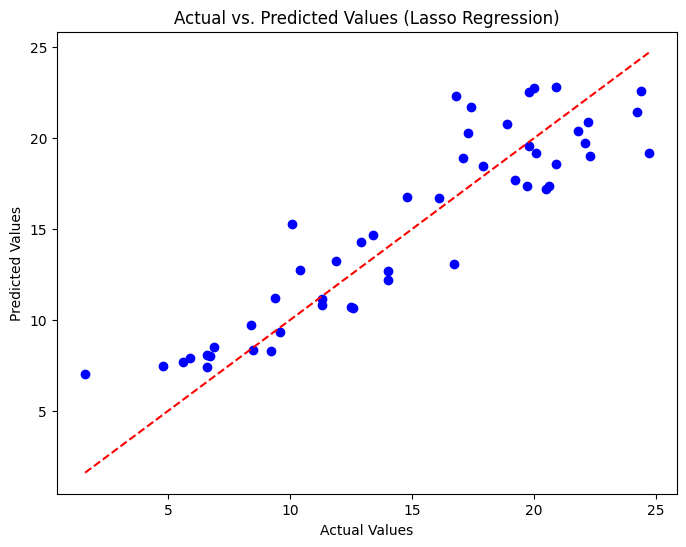

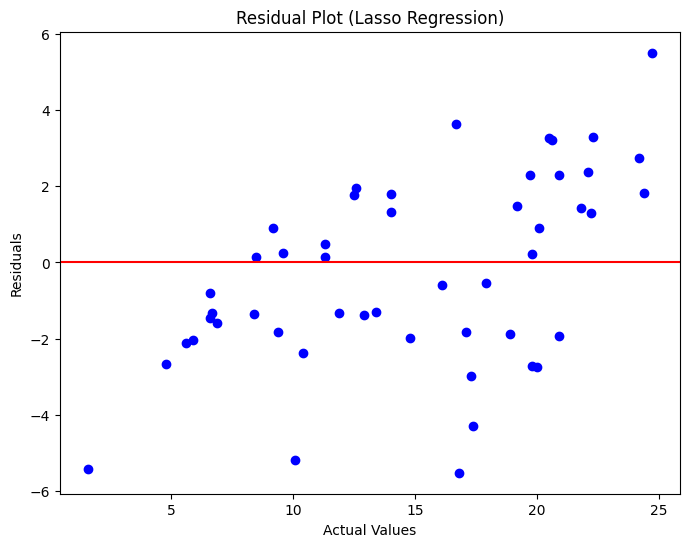

In [ ]:
lasso_regressor = Lasso(alpha=0.1)  # regularization of strength with the alpha parameter
lasso_regressor.fit(X, y)
y_pred_lasso = lasso_regressor.predict(X_test)

# Mean Squared Error (MSE)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Mean Squared Error (MSE) for Lasso Regression:", mse_lasso)

# Root Mean Squared Error (RMSE)
rmse_lasso = np.sqrt(mse_lasso)
print("Root Mean Squared Error (RMSE) for Lasso Regression:", rmse_lasso)

# Mean Absolute Error (MAE)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print("Mean Absolute Error (MAE) for Lasso Regression:", mae_lasso)

plt.figure(figsize=(8, 6))

# Actual vs. predicted values
plt.scatter(y_test, y_pred_lasso, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Lasso Regression)')
plt.show()

# Residual Plot
residuals_lasso = y_test - y_pred_lasso
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals_lasso, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Lasso Regression)')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


4. K-Neighbors Regressor

Mean Squared Error (MSE) for KNN Regression: 4.420984000000001
Root Mean Squared Error (RMSE) for KNN Regression: 2.1026136116747653
Mean Absolute Error (MAE) for KNN Regression: 1.6867999999999999


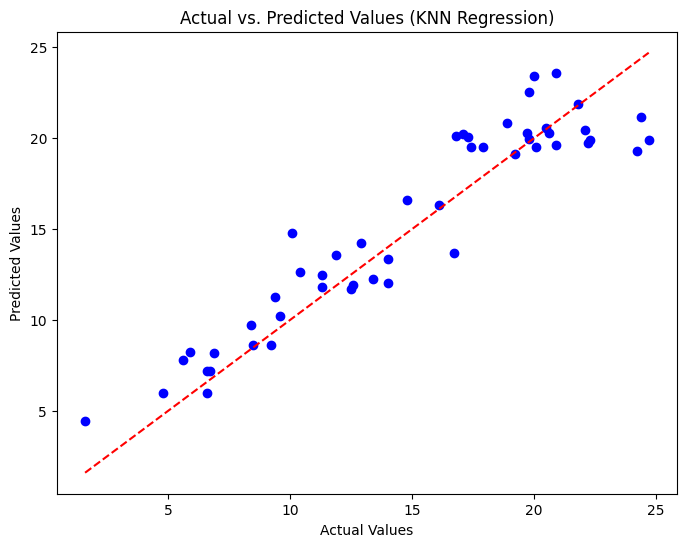

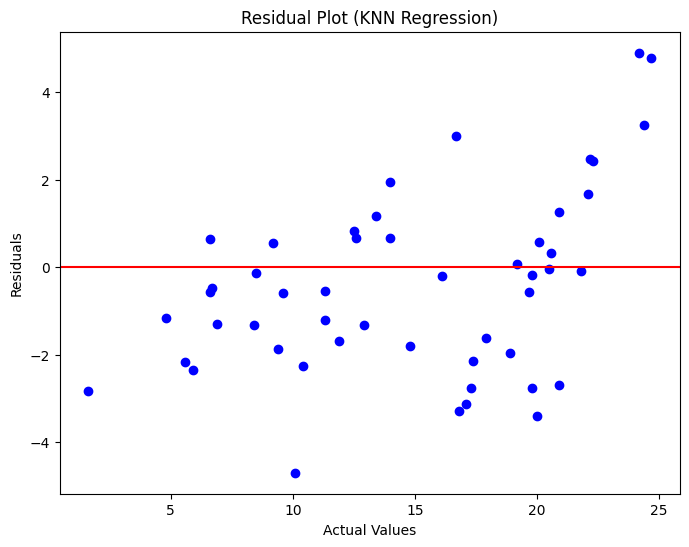

In [ ]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X, y)
y_pred_knn = knn_regressor.predict(X_test)

# Mean Squared Error (MSE)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print("Mean Squared Error (MSE) for KNN Regression:", mse_knn)

# Root Mean Squared Error (RMSE)
rmse_knn = np.sqrt(mse_knn)
print("Root Mean Squared Error (RMSE) for KNN Regression:", rmse_knn)

# Mean Absolute Error (MAE)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
print("Mean Absolute Error (MAE) for KNN Regression:", mae_knn)

plt.figure(figsize=(8, 6))

# Actual vs. predicted values
plt.scatter(y_test, y_pred_knn, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (KNN Regression)')
plt.show()

# Residual Plot
residuals_knn = y_test - y_pred_knn
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals_knn, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (KNN Regression)')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


5.Random Forest Regression

Mean Squared Error (MSE) for Random Forest Regression: 1.3306348340472727
Root Mean Squared Error (RMSE) for Random Forest Regression: 1.1535314620968398
Mean Absolute Error (MAE) for Random Forest Regression: 0.8830883333333329


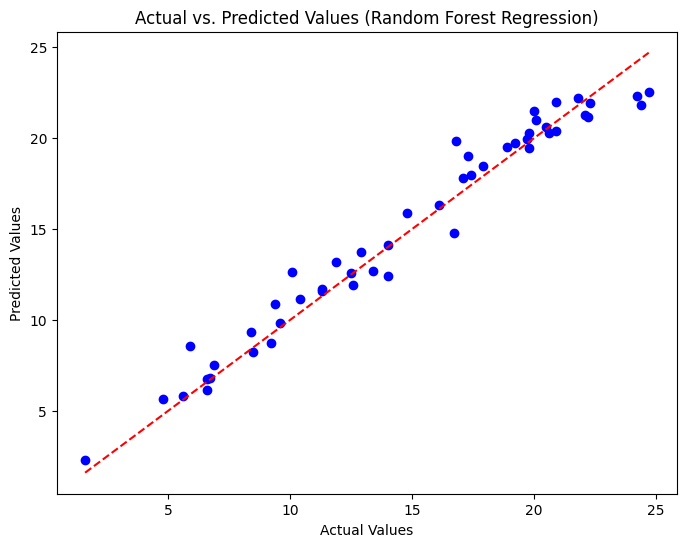

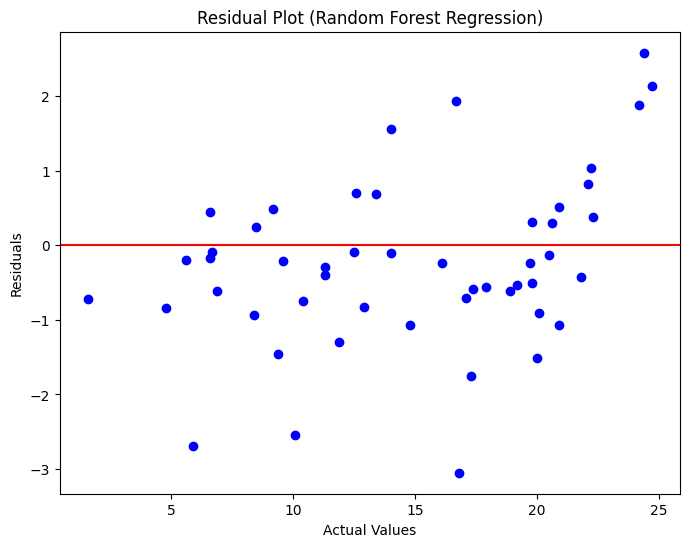

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X, y)
y_pred_rf = rf_regressor.predict(X_test)

# Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error (MSE) for Random Forest Regression:", mse_rf)

# Root Mean Squared Error (RMSE)
rmse_rf = np.sqrt(mse_rf)
print("Root Mean Squared Error (RMSE) for Random Forest Regression:", rmse_rf)

# Mean Absolute Error (MAE)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print("Mean Absolute Error (MAE) for Random Forest Regression:", mae_rf)

plt.figure(figsize=(8, 6))

# Actual vs. predicted values
plt.scatter(y_test, y_pred_rf, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Random Forest Regression)')
plt.show()

# Residual Plot
residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals_rf, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Random Forest Regression)')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


6. XGBoost Regression

Mean Squared Error (MSE) for XGBoost Regression: 0.39322603327210376
Root Mean Squared Error (RMSE) for XGBoost Regression: 0.6270773742307274
Mean Absolute Error (MAE) for XGBoost Regression: 0.3308578968048094


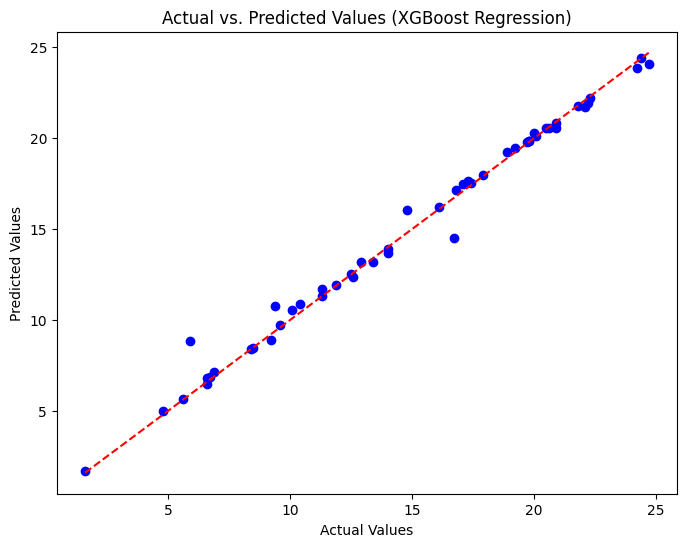

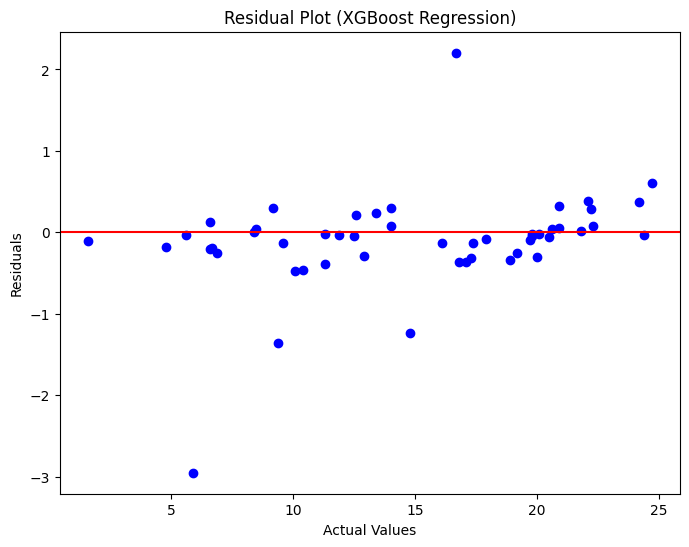

In [ ]:
xgb_regressor = XGBRegressor(n_estimators=100, random_state=42)
xgb_regressor.fit(X, y)
y_pred_xgb = xgb_regressor.predict(X_test)

# Mean Squared Error (MSE)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("Mean Squared Error (MSE) for XGBoost Regression:", mse_xgb)

# Root Mean Squared Error (RMSE)
rmse_xgb = np.sqrt(mse_xgb)
print("Root Mean Squared Error (RMSE) for XGBoost Regression:", rmse_xgb)

# Mean Absolute Error (MAE)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print("Mean Absolute Error (MAE) for XGBoost Regression:", mae_xgb)

plt.figure(figsize=(8, 6))

# Actual vs. predicted values
plt.scatter(y_test, y_pred_xgb, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (XGBoost Regression)')
plt.show()

# Residual Plot
residuals_xgb = y_test - y_pred_xgb
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals_xgb, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (XGBoost Regression)')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


## **Best Model -- *XGboost Regression***


### Mean Squared Error (MSE) for XGBoost Regression: **0.393**

### Root Mean Squared Error (RMSE) for XGBoost Regression: **0.627**

### Mean Absolute Error (MAE) for XGBoost Regression: **0.331**